In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
# اصلاح داده‌های پرت
data = data[(data['thalachh']>=50) & (data['thalachh']<=220)]

In [49]:
# جدا کردن ویژگی‌های ورودی (X) و خروجی (y)
X = data.drop('output', axis=1)
y = data['output']

In [50]:
# جدا کردن داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# اصلاح داده‌های پرت با میانگین
X_train['oldpeak'] = X_train['oldpeak'].fillna(X_train['oldpeak'].mean())
X_test['oldpeak'] = X_test['oldpeak'].fillna(X_train['oldpeak'].mean())

In [52]:
# حذف ویژگی‌های کم اهمیت
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)
important_features = X_train.columns[selector.support_]
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

/home/ilyanozary/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ilyanozary/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [53]:
# مقیاس‌دار کردن داده‌ها با استفاده از RobustScaler
scaler = RobustScaler()
X_train_selected[X_train_selected.columns] = scaler.fit_transform(X_train_selected[X_train_selected.columns])
X_test_selected[X_test_selected.columns] = scaler.transform(X_test_selected[X_test_selected.columns])


/tmp/ipykernel_20016/2488953246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected[X_train_selected.columns] = scaler.fit_transform(X_train_selected[X_train_selected.columns])
/tmp/ipykernel_20016/2488953246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected[X_test_selected.columns] = scaler.transform(X_test_selected[X_test_selected.columns])


In [54]:
clf = LogisticRegression()
clf.fit(X_train_selected, y_train)


LogisticRegression()

In [55]:
y_pred = clf.predict(X_test_selected)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 4 28]]


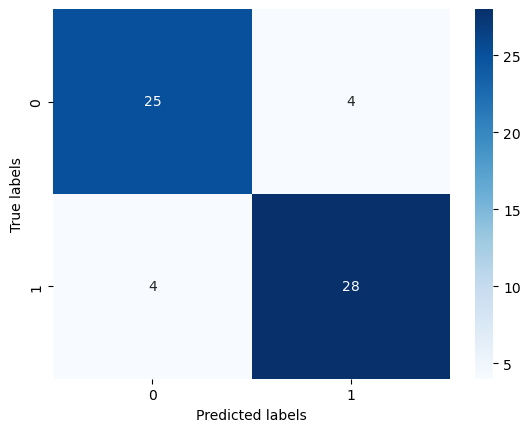

In [61]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1}')

f1-score : 0.875
